In [41]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage.metrics import structural_similarity as ssim

In [ ]:
# Function for adapting brightness of the image
def adjust_brightness(image, target_brightness):
    current_brightness = np.mean(image) # Average brightness of the passed image

    brightness_factor = (target_brightness) / current_brightness # Scale factor to adapt brightness

    adjusted_image = np.clip(image * brightness_factor, 0, 255).astype(np.uint8) 
    return adjusted_image

In [ ]:
def process_img_brightness(pulite_path, perdite_path, vergine_path):
    img_pulite = cv2.resize(cv2.imread(pulite_path, cv2.IMREAD_GRAYSCALE), (256,256))
    img_perdite = cv2.resize(cv2.imread(perdite_path, cv2.IMREAD_GRAYSCALE), (256,256))
    img_vergine = cv2.resize(cv2.imread(vergine_path, cv2.IMREAD_GRAYSCALE), (256,256))

    # Average images brightness
    print(f"Luminosità media immagine 1: {np.mean(img_pulite)}")
    print(f"Luminosità media immagine 2: {np.mean(img_perdite)}")
    print(f"Luminosità media immagine 3: {np.mean(img_vergine)}")

    # If brightness too low, target brightness is the maximum
    if(max(np.mean(img_pulite),np.mean(img_perdite),np.mean(img_vergine)) < 20.0): 
        target_brightness = max(np.mean(img_pulite),np.mean(img_perdite),np.mean(img_vergine))
    else:
        target_brightness = min(np.mean(img_pulite),np.mean(img_perdite),np.mean(img_vergine))

    # Adapting target brightness to all the other images
    adjusted_img_pulite = adjust_brightness(img_pulite, target_brightness) 
    adjusted_img_perdite = adjust_brightness(img_perdite, target_brightness)
    adjusted_img_vergine = adjust_brightness(img_vergine, target_brightness)
    print(f"Luminosità media immagine 1 adjusted: {np.mean(adjusted_img_pulite)}")
    print(f"Luminosità media immagine 2 adjusted: {np.mean(adjusted_img_perdite)}")
    print(f"Luminosità media immagine 3 adjusted: {np.mean(adjusted_img_vergine)}")
    
    #SHOW IMAGE################################################################################################
    '''fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    axes[0].imshow(img_pulite, cmap='gray')
    axes[0].set_title("Original Image Pulita "+os.path.basename(pulite_path))
    axes[0].axis("off")

    axes[1].imshow(img_perdite, cmap='gray')
    axes[1].set_title("Original Image Perdite "+os.path.basename(perdite_path))
    axes[1].axis("off")

    axes[2].imshow(img_vergine, cmap='gray')
    axes[2].set_title("Original Image Vergine "+os.path.basename(vergine_path))
    axes[2].axis("off")

    fig1, axes1 = plt.subplots(1, 3, figsize=(20, 5))
    axes1[0].imshow(adjusted_img_pulite, cmap='gray')
    axes1[0].set_title("Adjusted Image Pulite "+os.path.basename(pulite_path))
    axes1[0].axis("off")

    axes1[1].imshow(adjusted_img_perdite, cmap='gray')
    axes1[1].set_title("Adjusted Image Perdite "+os.path.basename(perdite_path))
    axes1[1].axis("off")

    axes1[2].imshow(adjusted_img_vergine, cmap='gray')
    axes1[2].set_title("Adjusted Image Vergine "+os.path.basename(vergine_path))
    axes1[2].axis("off")

    plt.show()'''
    #SHOW IMAGE################################################################################################

    return adjusted_img_pulite, adjusted_img_perdite, adjusted_img_vergine

In [ ]:
# Applying filters and mask to the passed image 
def process_and_display_image(image_path, image):
    ddepth = cv2.CV_16S
    kernel_size = 3
    
    clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
    image_clahe = clahe.apply(image)

    #equalized_image = cv2.equalizeHist(image)

    blurred = cv2.GaussianBlur(image, (5,5), 0)  # Apply Gaussian Blur
    laplacian = cv2.Laplacian(blurred, ddepth, ksize=kernel_size)  # Apply Laplacian filter
    abs_laplacian = cv2.convertScaleAbs(laplacian)

    threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    #adapt_threshold = cv2.adaptiveThreshold(blurred,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

    lwr = np.array([200]) # Minimum value of the mask
    upp = np.array([255]) # Maximum value of the mask
    image_mask = cv2.inRange(image, lwr, upp)
    blurred_mask1 = cv2.inRange(blurred, lwr, upp)
    image_clahe = cv2.inRange(image_clahe, lwr, upp)

    # Display images
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    axes[0].imshow(image, cmap='gray')
    axes[0].set_title("Original")
    axes[0].axis("off")

    axes[1].imshow(blurred_mask1, cmap='gray')
    axes[1].set_title("Blurred_mask")
    axes[1].axis("off")

    axes[2].imshow(image_mask, cmap='gray')
    axes[2].set_title("image_mask")
    axes[2].axis("off")

    axes[3].imshow(image_clahe, cmap='gray')
    axes[3].set_title("Image_clahe")
    axes[3].axis("off")

    plt.suptitle(os.path.basename(image_path))
    plt.show()

    return image_mask

Luminosità media immagine 1: 111.6845703125
Luminosità media immagine 2: 55.78245544433594
Luminosità media immagine 3: 62.464019775390625
Luminosità media immagine 1 adjusted: 55.11369323730469
Luminosità media immagine 2 adjusted: 55.78245544433594
Luminosità media immagine 3 adjusted: 55.29823303222656
Luminosità media immagine 1: 12.253067016601562
Luminosità media immagine 2: 7.93951416015625
Luminosità media immagine 3: 6.7595367431640625
Luminosità media immagine 1 adjusted: 12.253067016601562
Luminosità media immagine 2 adjusted: 11.740951538085938
Luminosità media immagine 3 adjusted: 11.69915771484375


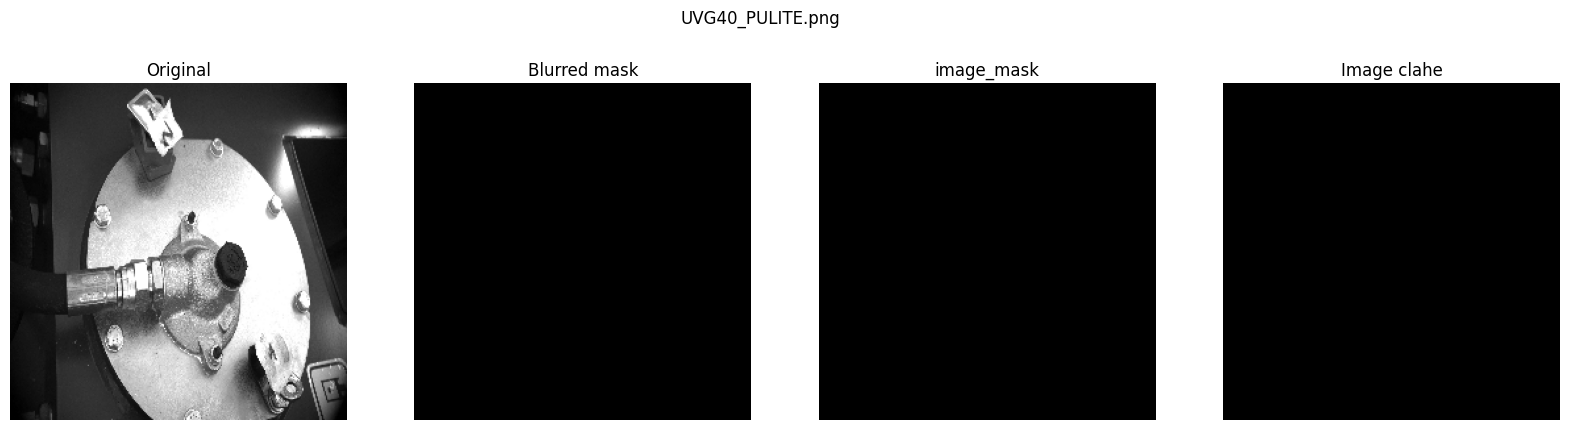

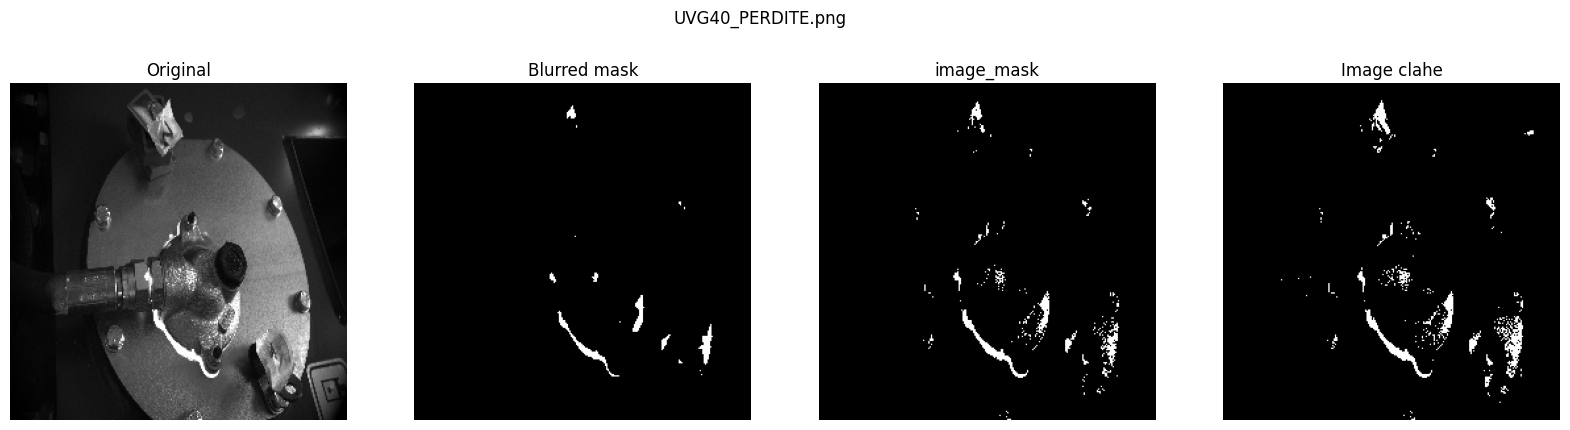

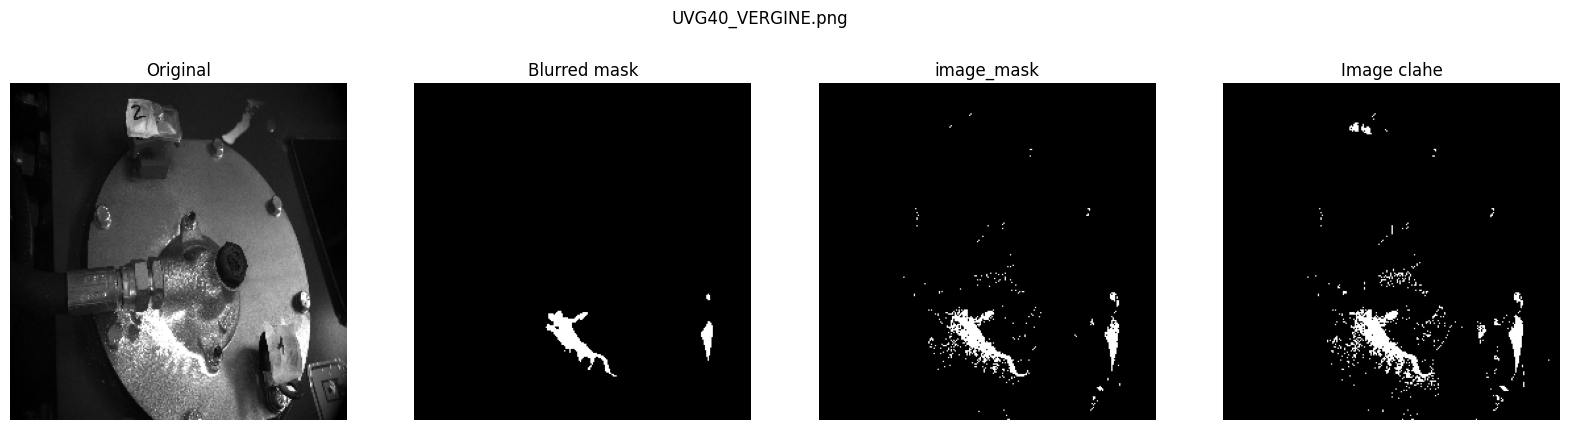

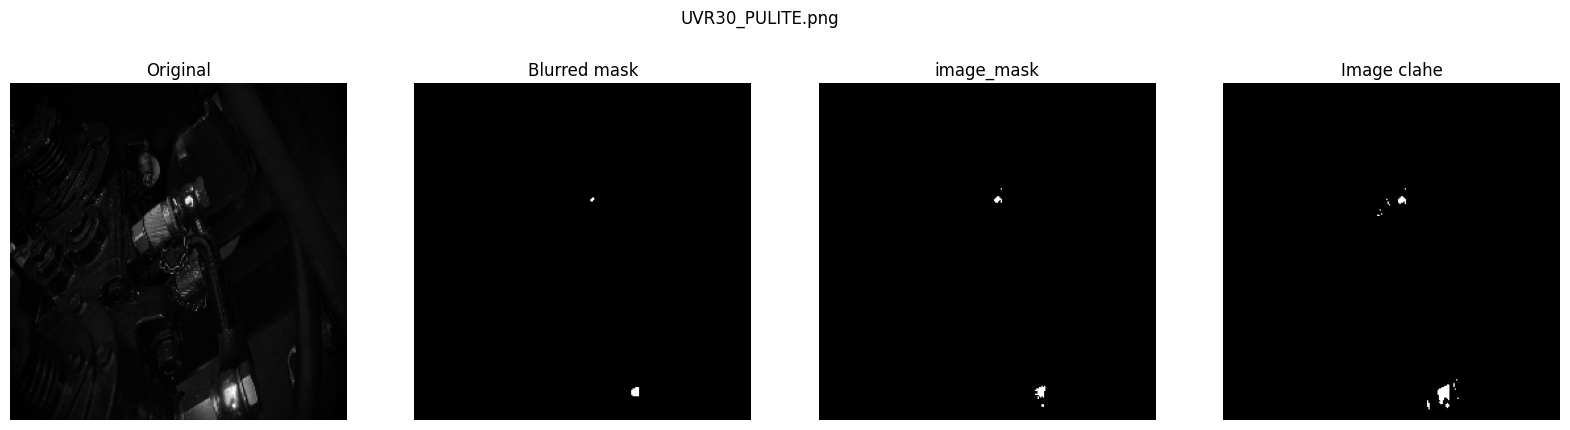

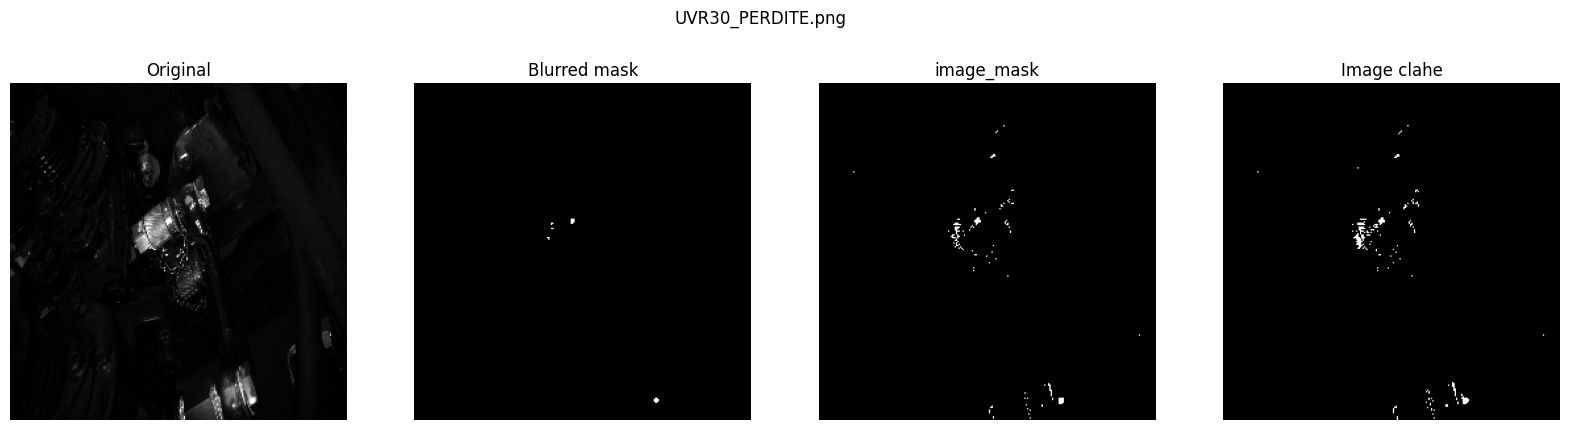

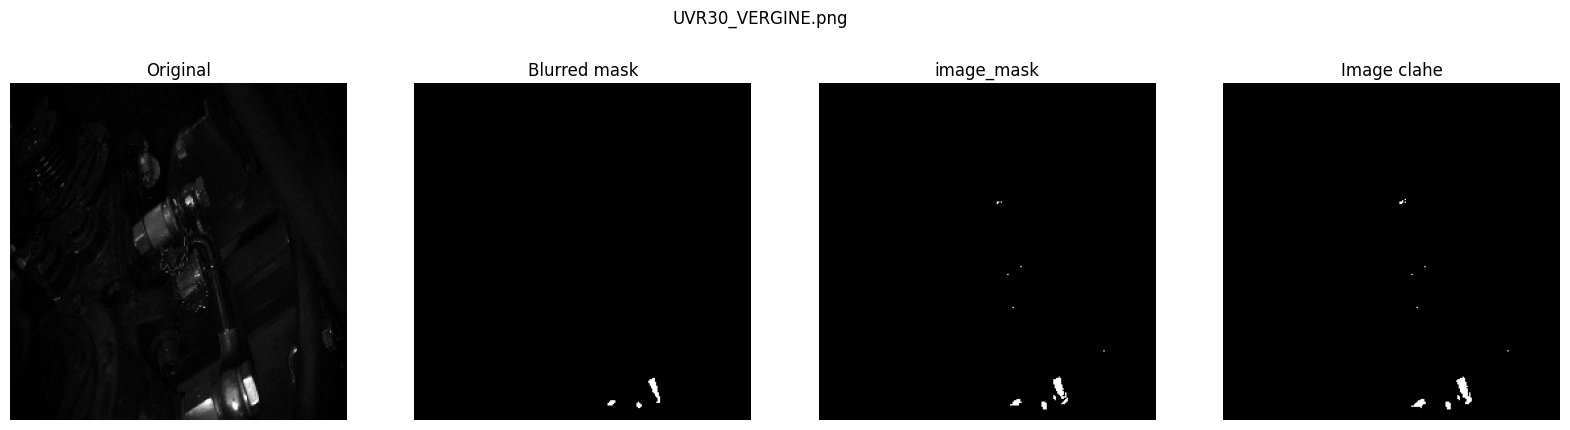

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(256, 256), dtype=uint8)

In [45]:
from pathlib import Path

# Carica le due immagini (modifica i percorsi dei file)
'''img_pulite = cv2.imread('drive/MyDrive/Lavoro/Progetti/SHED/datasetSuddiviso/UV50/PULITE.png', cv2.IMREAD_GRAYSCALE)
img_perdite = cv2.imread('drive/MyDrive/Lavoro/Progetti/SHED/datasetSuddiviso/UV50/PERDITE.png', cv2.IMREAD_GRAYSCALE)''' # TODO CAMBIATO

pulite_path = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddiviso/UVG40/UVG40_PULITE.png')
perdite_path = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddiviso/UVG40/UVG40_PERDITE.png')
vergine_path = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddiviso/UVG40/UVG40_VERGINE.png')

pulite_path_red = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddivisoUvRed/UVR30/UVR30_PULITE.png')
perdite_path_red = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddivisoUvRed/UVR30/UVR30_PERDITE.png')
vergine_path_red = Path('/Users/filipporeucci/oilSpotRecognition/datasetSuddivisoUvRed/UVR30/UVR30_VERGINE.png')

adjusted_img_pulite, adjusted_img_perdite, adjusted_img_vergine = process_img_brightness(pulite_path, perdite_path, vergine_path)
adjusted_img_pulite_red, adjusted_img_perdite_red, adjusted_img_vergine_red = process_img_brightness(pulite_path_red, perdite_path_red, vergine_path_red)

process_and_display_image(pulite_path, adjusted_img_pulite)
process_and_display_image(perdite_path, adjusted_img_perdite)
process_and_display_image(vergine_path, adjusted_img_vergine)

process_and_display_image(pulite_path_red, adjusted_img_pulite_red)
process_and_display_image(perdite_path_red, adjusted_img_perdite_red)
process_and_display_image(vergine_path_red, adjusted_img_vergine_red)